In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.express as px

In [151]:

df = pd.read_csv("Group Stock.csv" ,index_col='Date')
df = df.drop(columns=["Unnamed: 0"])
df.head(10)

,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,Google_Price,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-04,2724.87,6959.96,177350000.0,42.81,125980000.0,20.86,110280000.0,105.74,31320000.0,57.07,...,37.30,52860000.0,312000.0,310.0,351.34,9050000.0,81.67,98580000.0,169.25,20040000.0
2019-02-05,2737.70,7023.52,206730000.0,43.55,144410000.0,21.42,101140000.0,107.22,27330000.0,57.59,...,37.49,54240000.0,310700.0,360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0
2019-02-06,2731.61,6997.62,193600000.0,43.56,112960000.0,21.15,75580000.0,106.03,20610000.0,56.14,...,38.25,70250000.0,308810.0,120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0
2019-02-07,2706.05,6904.98,204460000.0,42.73,126970000.0,20.50,97810000.0,105.27,29760000.0,55.30,...,36.85,63710000.0,302813.0,240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0
2019-02-08,2707.88,6913.13,168040000.0,42.60,95280000.0,20.39,87660000.0,105.67,21460000.0,55.12,...,37.04,46160000.0,300771.0,240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0
2019-02-11,2709.80,6909.19,166330000.0,42.36,83970000.0,20.86,106950000.0,105.25,18910000.0,55.11,...,36.61,49520000.0,304884.0,170.0,345.73,5450000.0,79.55,66350000.0,165.79,12810000.0
2019-02-12,2744.73,7014.67,188910000.0,42.72,89130000.0,20.79,82760000.0,106.89,25060000.0,56.38,...,37.79,59110000.0,309260.0,210.0,359.97,10430000.0,81.90,97170000.0,165.04,16290000.0
2019-02-13,2753.03,7015.88,168570000.0,42.55,89960000.0,20.54,77120000.0,106.81,18390000.0,56.43,...,38.22,60540000.0,308320.0,430.0,351.77,10560000.0,82.00,71210000.0,164.07,14210000.0
2019-02-14,2745.73,7022.42,168000000.0,42.70,87340000.0,20.25,78010000.0,106.90,21780000.0,56.46,...,38.63,82730000.0,303890.0,220.0,359.07,9300000.0,81.13,82410000.0,163.95,12760000.0


In [152]:
columns = df.columns
price = [col for col in columns if 'Price' in col]
volume = [col for col in columns if 'Vol.' in col]


In [153]:
simple_return = [x.replace('Price', 'Simple_return') for x in price]
df[simple_return] = df[price].pct_change() * 100
df= df.fillna(0)

In [154]:
df.head().T

Date,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08
S&P_500_Price,2.724870e+03,2.737700e+03,2.731610e+03,2.706050e+03,2.707880e+03
Nasdaq_100_Price,6.959960e+03,7.023520e+03,6.997620e+03,6.904980e+03,6.913130e+03
Nasdaq_100_Vol.,1.773500e+08,2.067300e+08,1.936000e+08,2.044600e+08,1.680400e+08
Apple_Price,4.281000e+01,4.355000e+01,4.356000e+01,4.273000e+01,4.260000e+01
Apple_Vol.,1.259800e+08,1.444100e+08,1.129600e+08,1.269700e+08,9.528000e+07
Tesla_Price,2.086000e+01,2.142000e+01,2.115000e+01,2.050000e+01,2.039000e+01
Tesla_Vol.,1.102800e+08,1.011400e+08,7.558000e+07,9.781000e+07,8.766000e+07
Microsoft_Price,1.057400e+02,1.072200e+02,1.060300e+02,1.052700e+02,1.056700e+02
Microsoft_Vol.,3.132000e+07,2.733000e+07,2.061000e+07,2.976000e+07,2.146000e+07
Google_Price,5.707000e+01,5.759000e+01,5.614000e+01,5.530000e+01,5.512000e+01


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 2019-02-04 to 2024-02-02
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S&P_500_Price             1243 non-null   float64
 1   Nasdaq_100_Price          1243 non-null   float64
 2   Nasdaq_100_Vol.           1243 non-null   float64
 3   Apple_Price               1243 non-null   float64
 4   Apple_Vol.                1243 non-null   float64
 5   Tesla_Price               1243 non-null   float64
 6   Tesla_Vol.                1243 non-null   float64
 7   Microsoft_Price           1243 non-null   float64
 8   Microsoft_Vol.            1243 non-null   float64
 9   Google_Price              1243 non-null   float64
 10  Google_Vol.               1243 non-null   float64
 11  Nvidia_Price              1243 non-null   float64
 12  Nvidia_Vol.               1243 non-null   float64
 13  Berkshire_Price           1243 non-null   float64
 14

<Axes: xlabel='Date'>

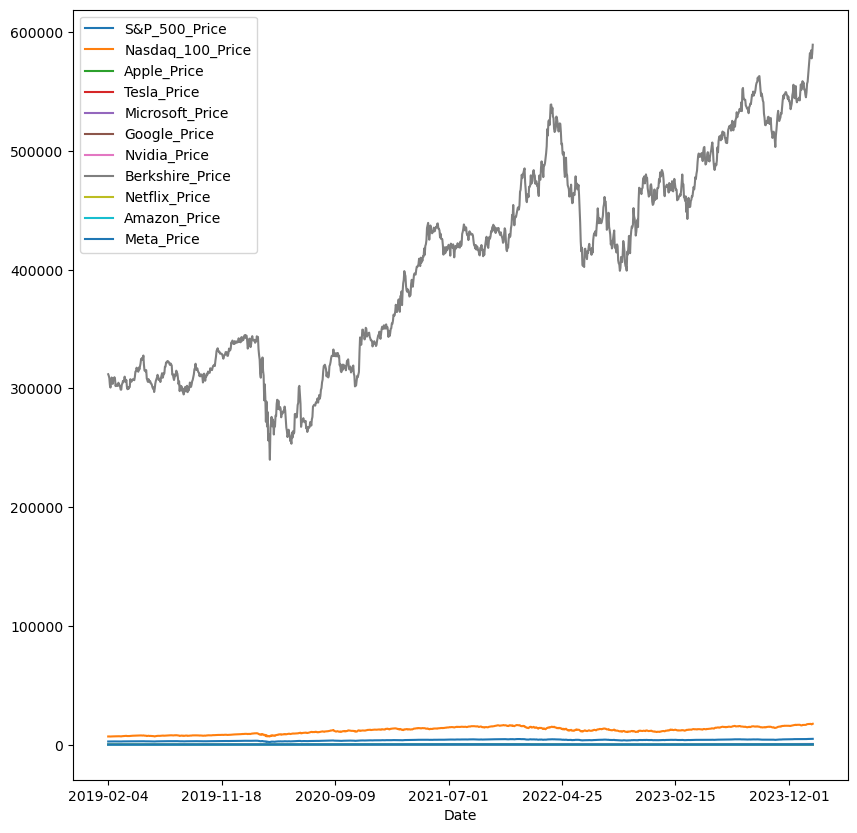

In [156]:
df[price].plot(figsize=(10,10))

In [157]:
df_price = df[price]
df_price_new= df_price/df_price.iloc[0]

<Axes: xlabel='Date'>

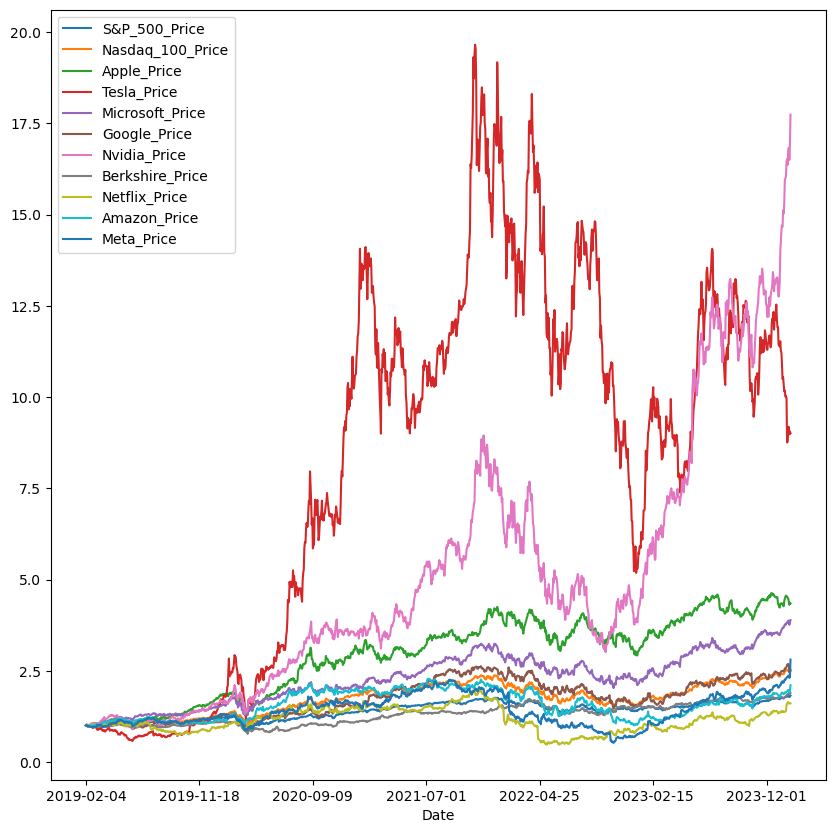

In [158]:
df_price_new.plot(figsize=(10,10))

In [159]:
fig = px.line(data_frame=df_price_new)
fig.show()

In [160]:
fig = px.line(data_frame=df_price_new['Amazon_Price'])
fig.show()

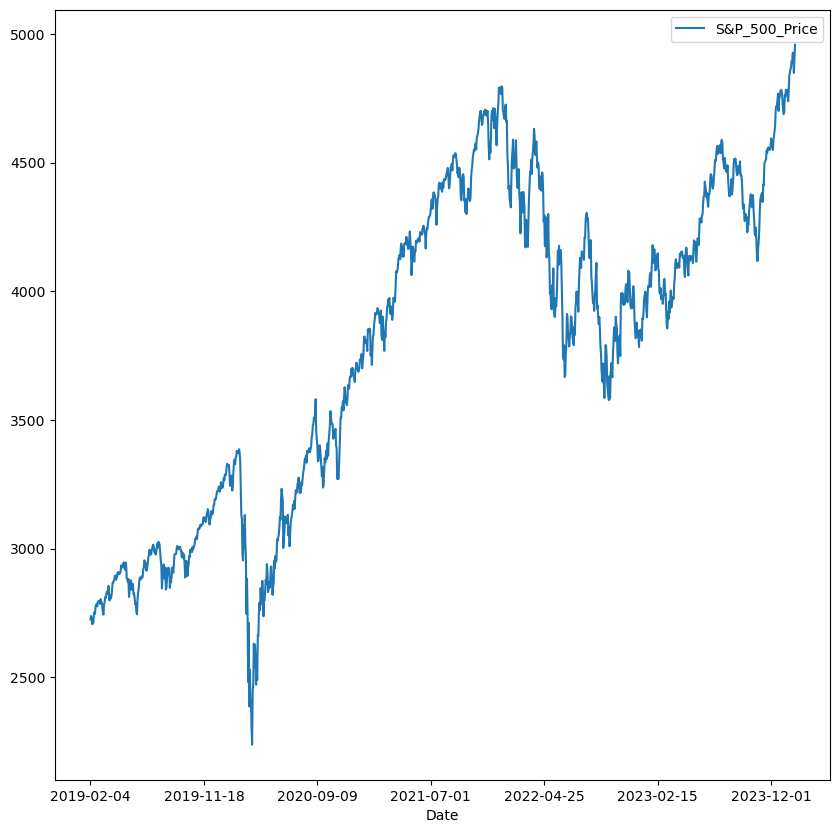

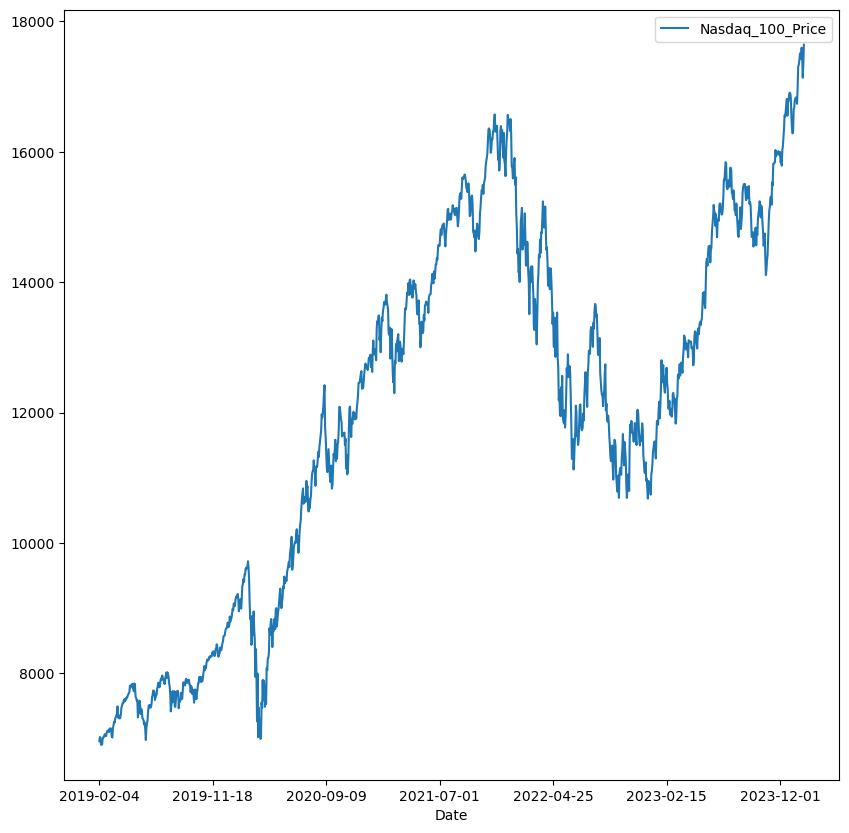

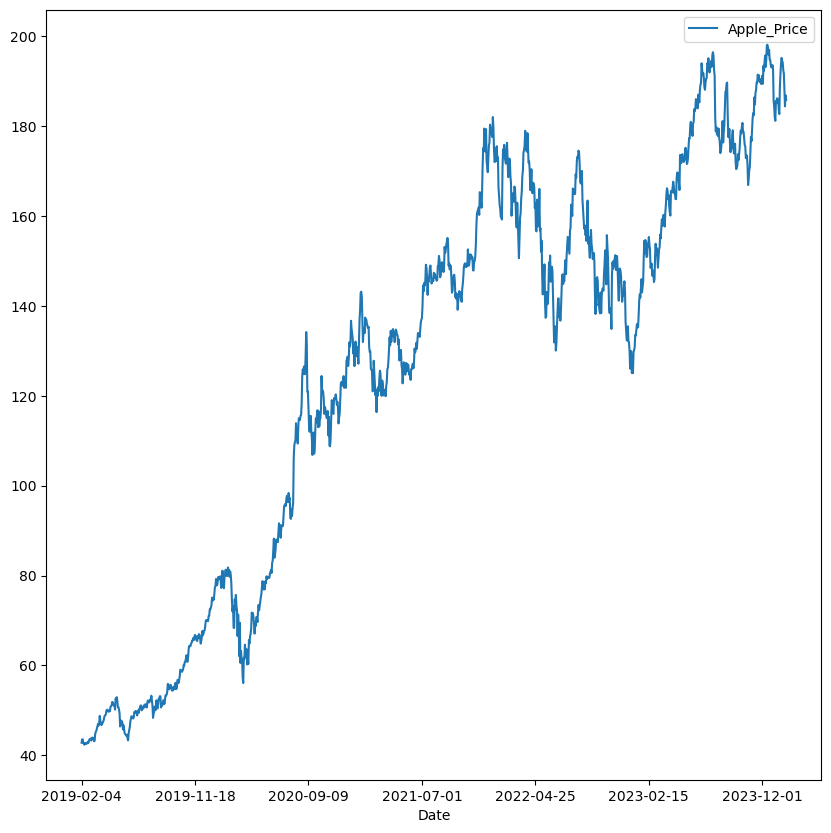

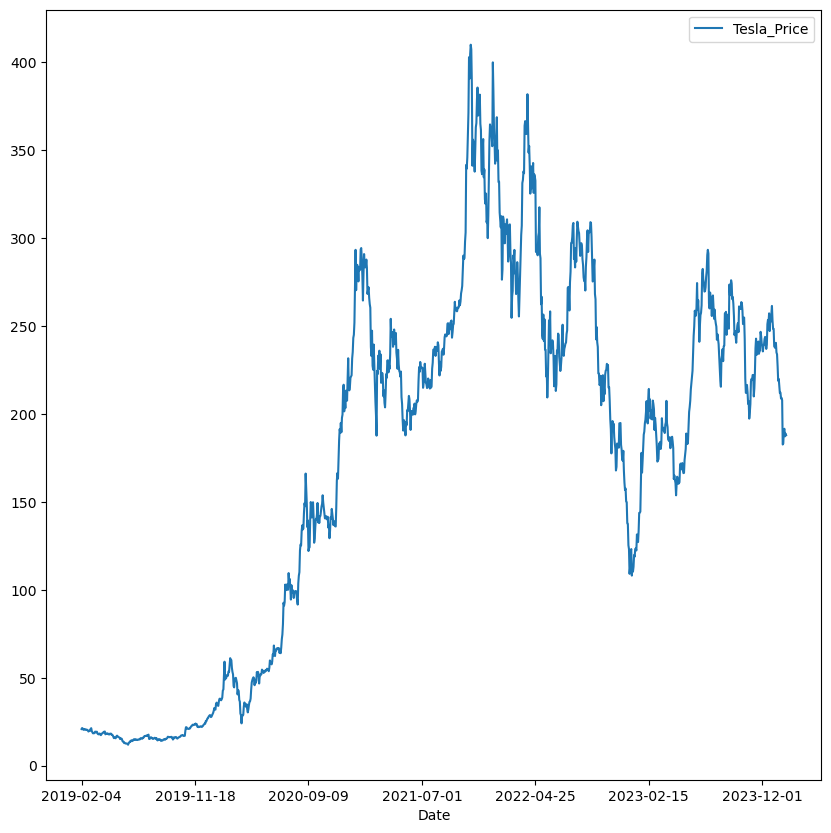

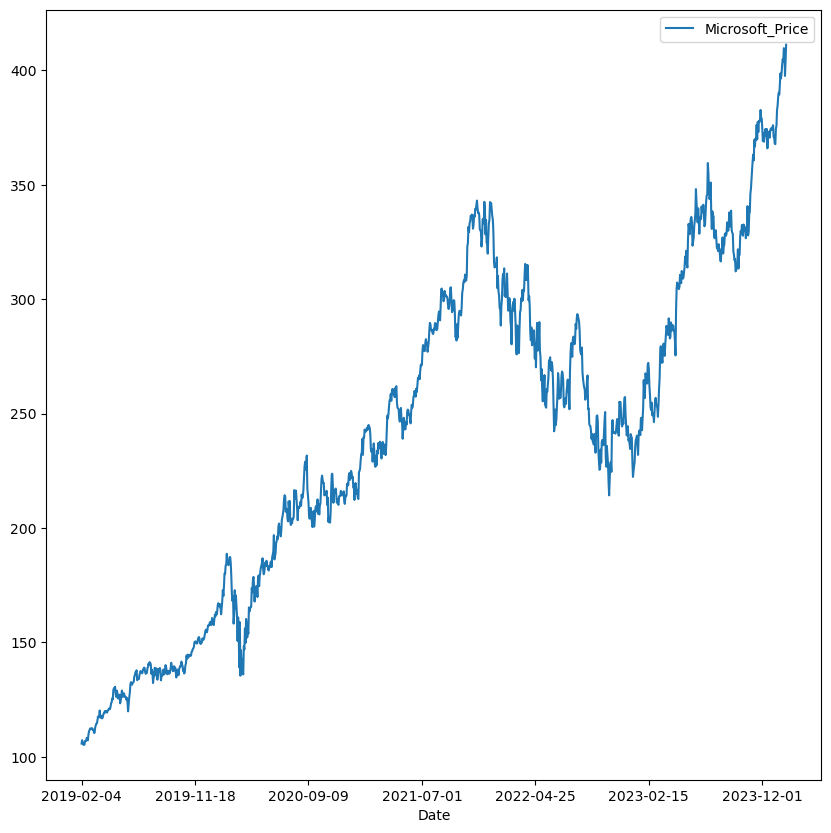

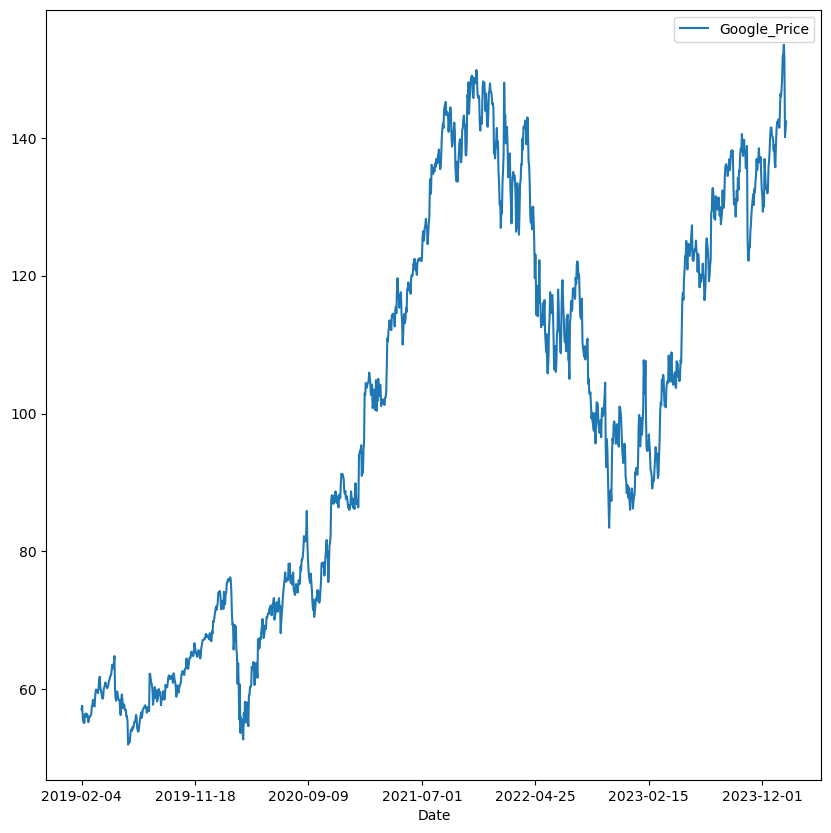

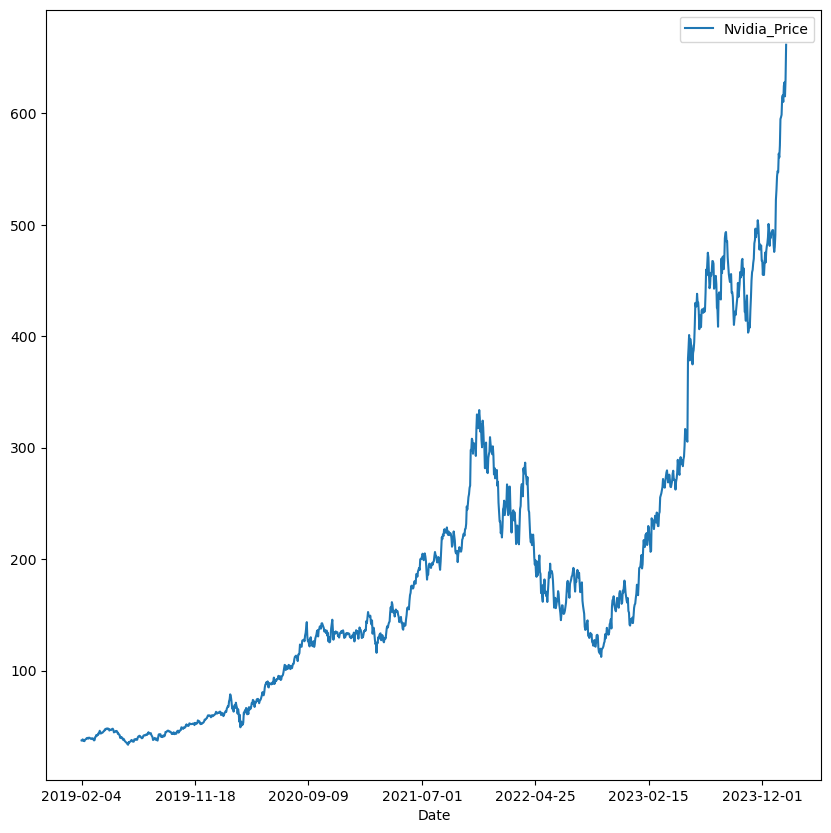

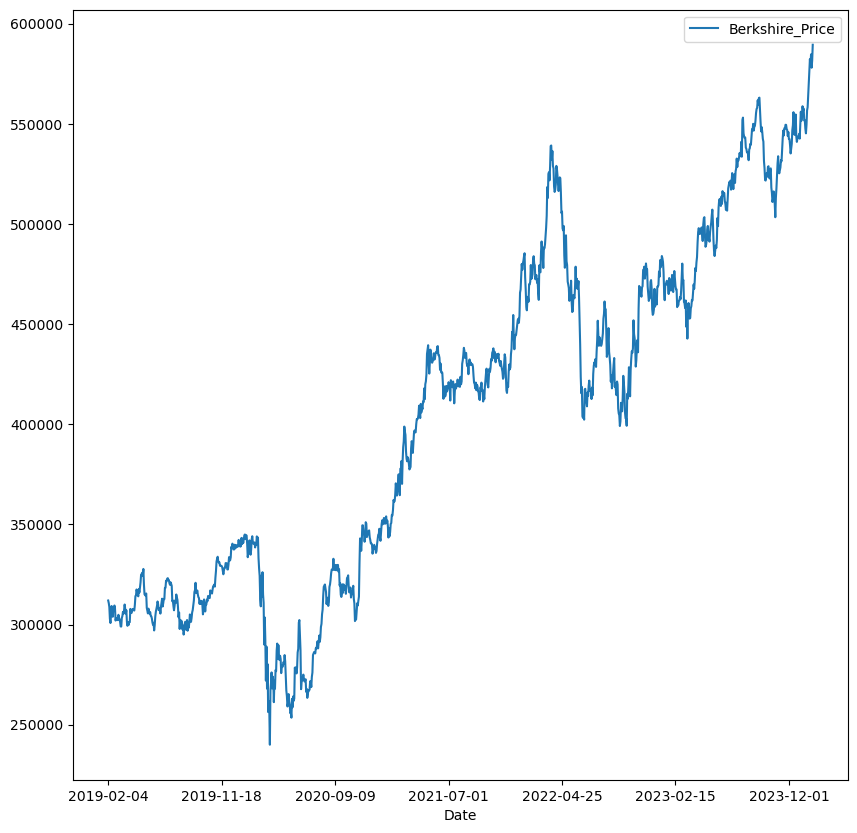

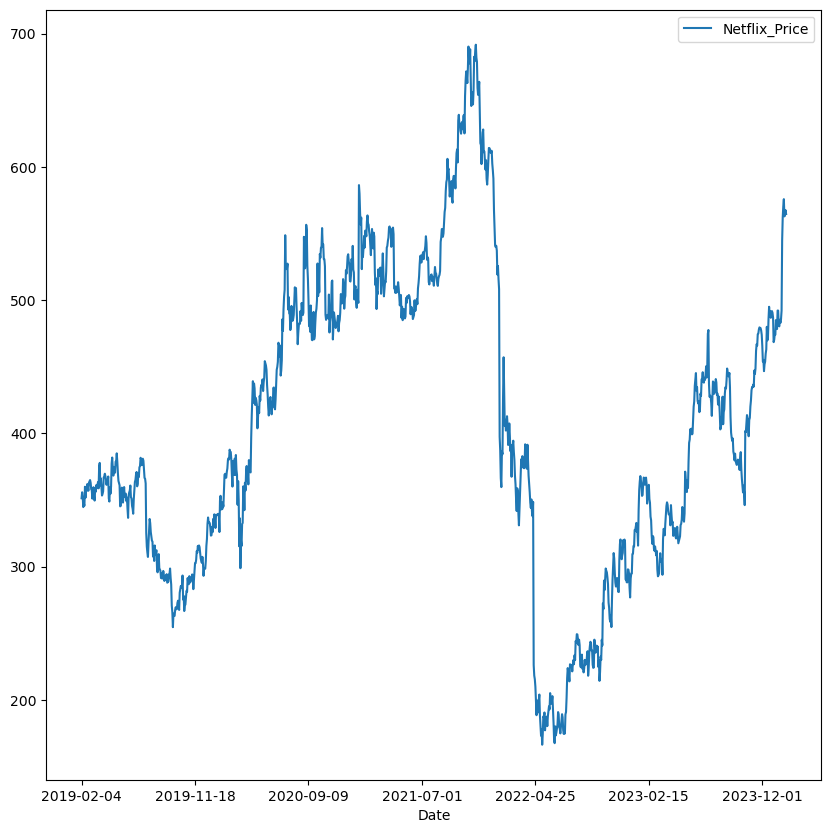

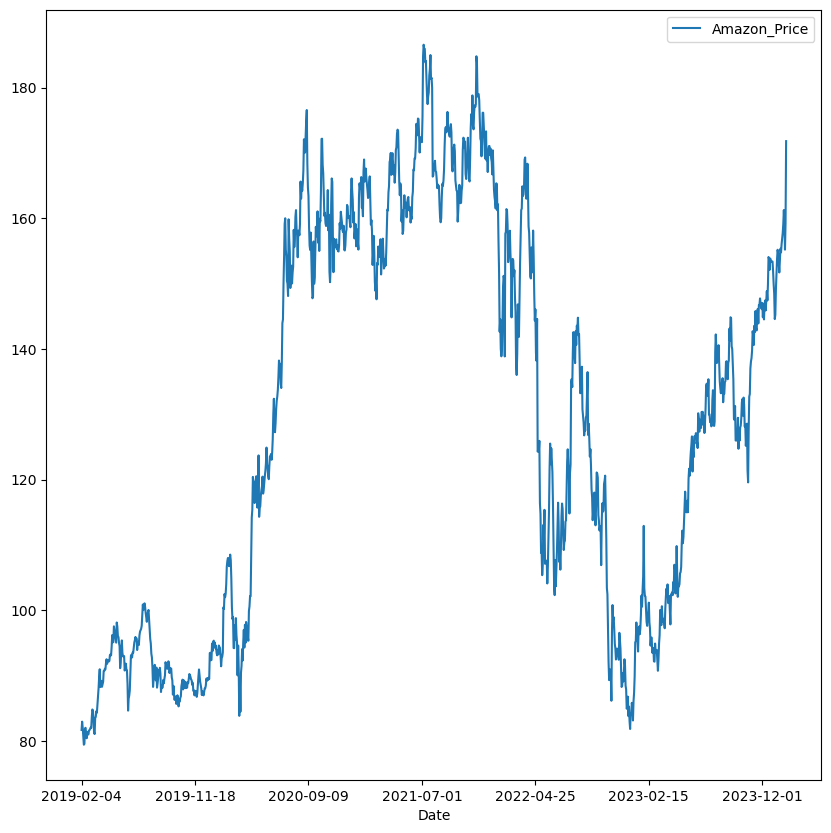

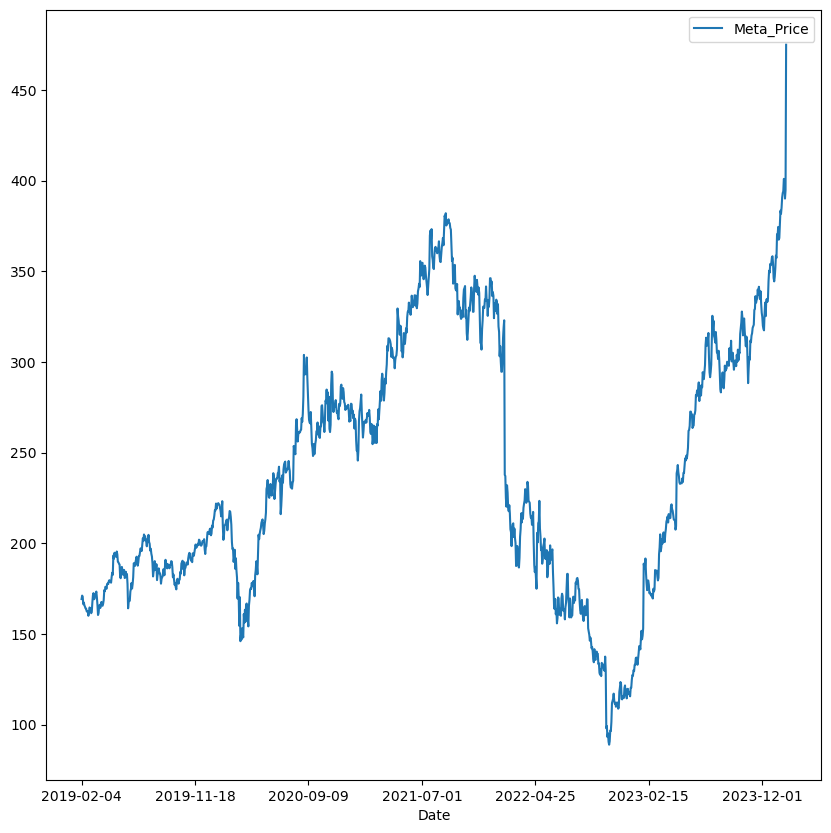

In [161]:
for i in price :
    df.plot(y=[i],figsize=(10,10))

In [162]:
mean_simple_return_day = 0
mean_simple_return_year = 0
mean_simple_return_array_day = []
mean_simple_return_array_year = []
for i in simple_return :
    mean_simple_return_day = df[i].mean()
    mean_simple_return_year=mean_simple_return_day*365
    print(f"Tỷ suất sinh lời trung bình theo ngày {mean_simple_return_day} of {i}")
    mean_simple_return_array_day.append(mean_simple_return_day)
    print(f"Tỷ suất sinh lời trung bình theo năm {mean_simple_return_year} of {i}")
    mean_simple_return_array_year.append(mean_simple_return_year)
    
    

Tỷ suất sinh lời trung bình theo ngày 0.057232395926921906 of S&P_500_Simple_return
Tỷ suất sinh lời trung bình theo năm 20.889824513326495 of S&P_500_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.08803186153412565 of Nasdaq_100_Simple_return
Tỷ suất sinh lời trung bình theo năm 32.13162945995586 of Nasdaq_100_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.13823618092149215 of Apple_Simple_return
Tỷ suất sinh lời trung bình theo năm 50.45620603634463 of Apple_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.2591230575590836 of Tesla_Simple_return
Tỷ suất sinh lời trung bình theo năm 94.57991600906551 of Tesla_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.1275492021161236 of Microsoft_Simple_return
Tỷ suất sinh lời trung bình theo năm 46.555458772385116 of Microsoft_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.09396996196284878 of Google_Simple_return
Tỷ suất sinh lời trung bình theo năm 34.2990361164398 of Google_Simple_return
Tỷ suất sinh lời trung

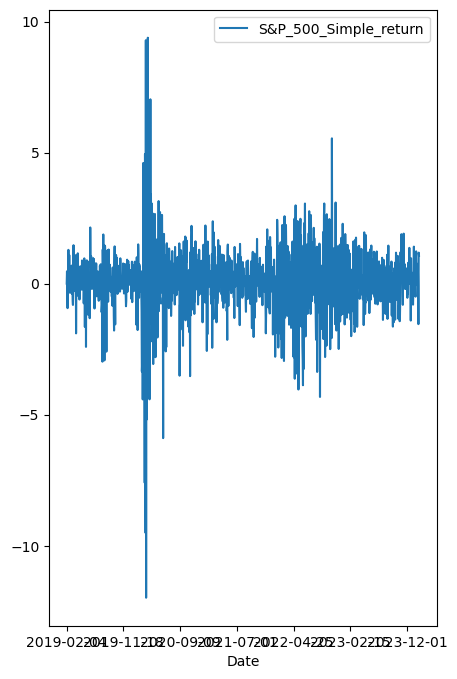

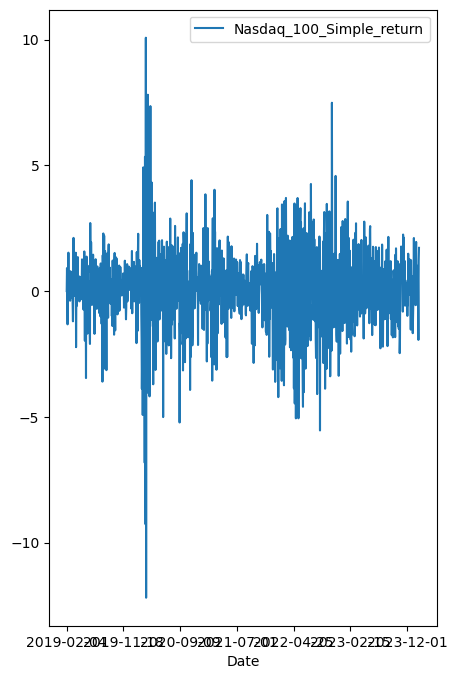

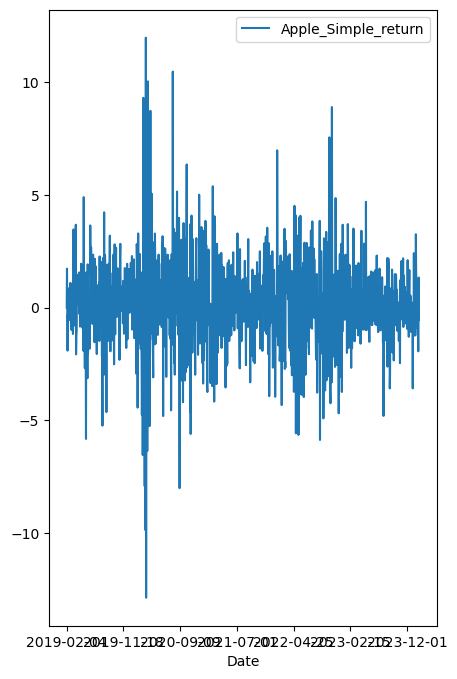

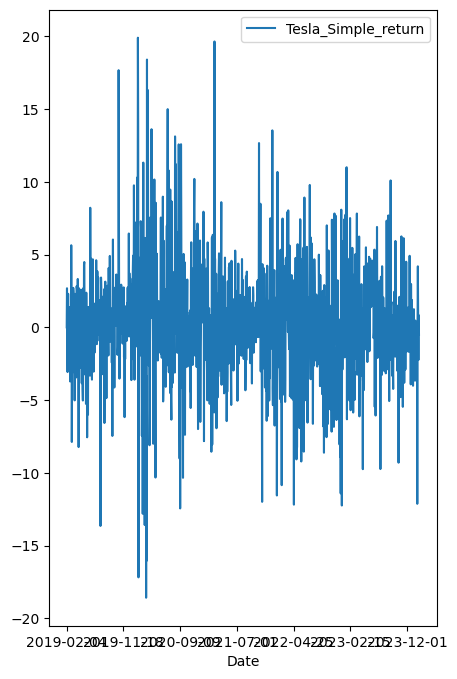

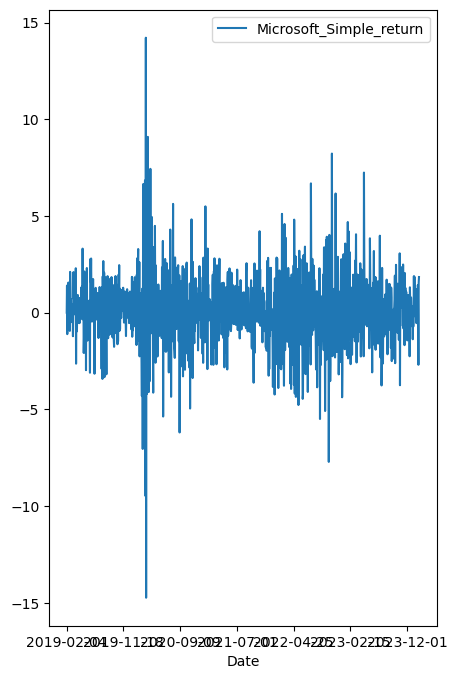

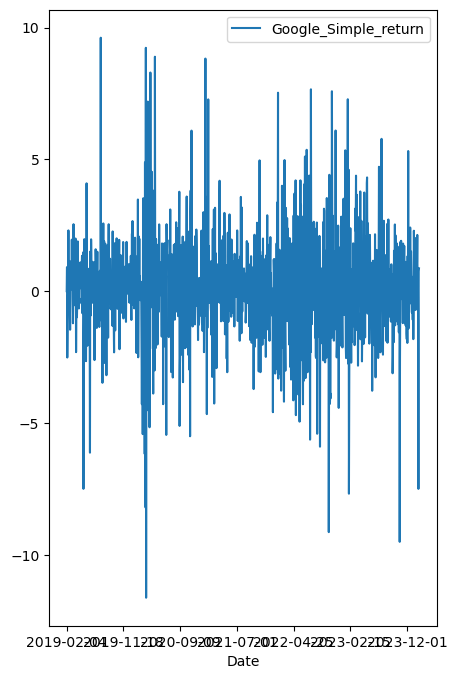

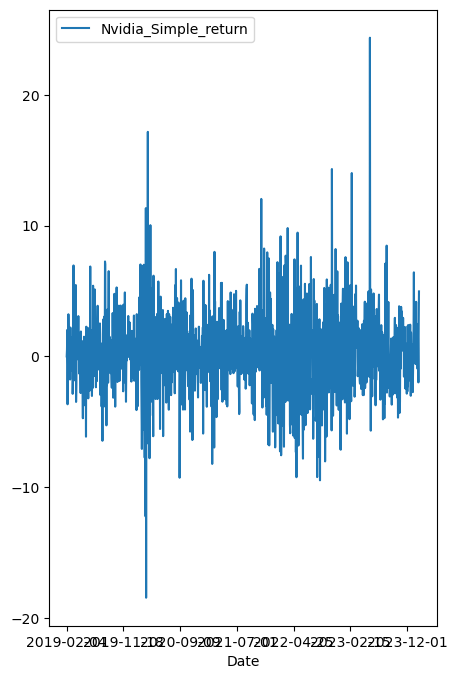

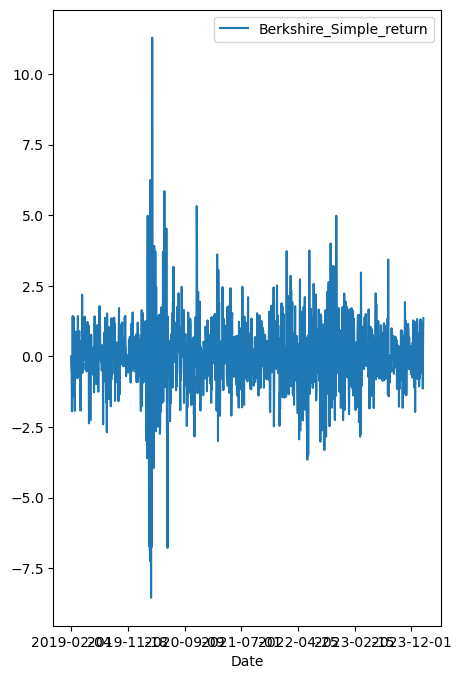

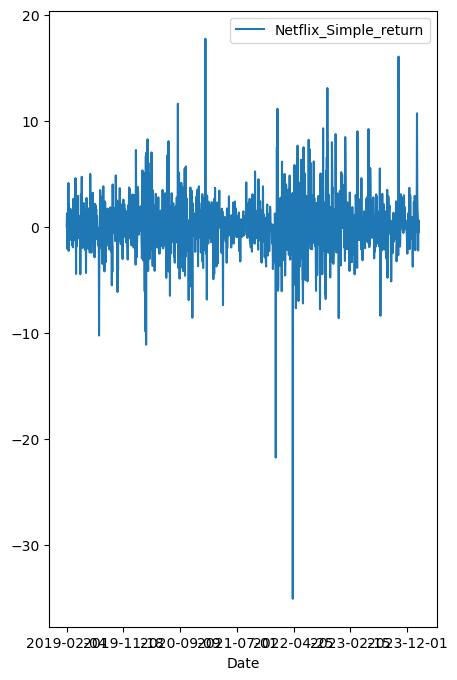

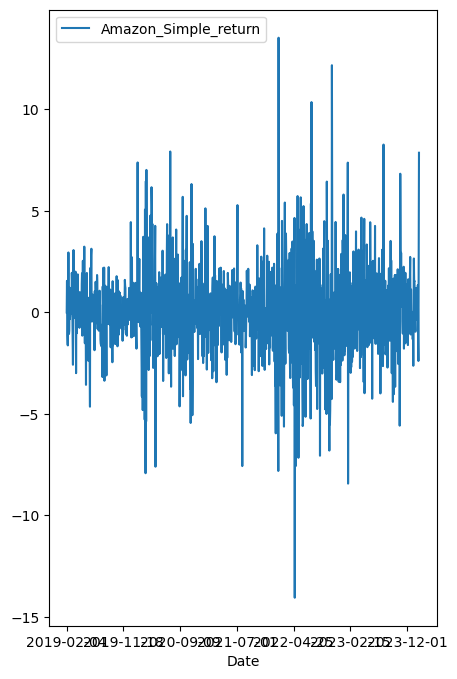

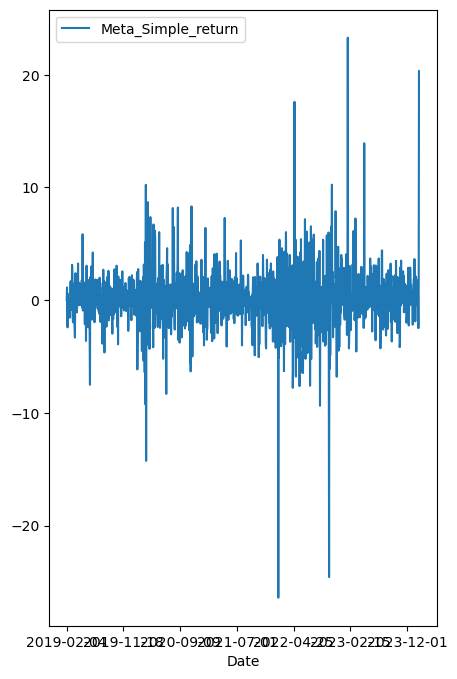

In [163]:
for i in simple_return :
    df.plot(y=[i],figsize=(5,8))

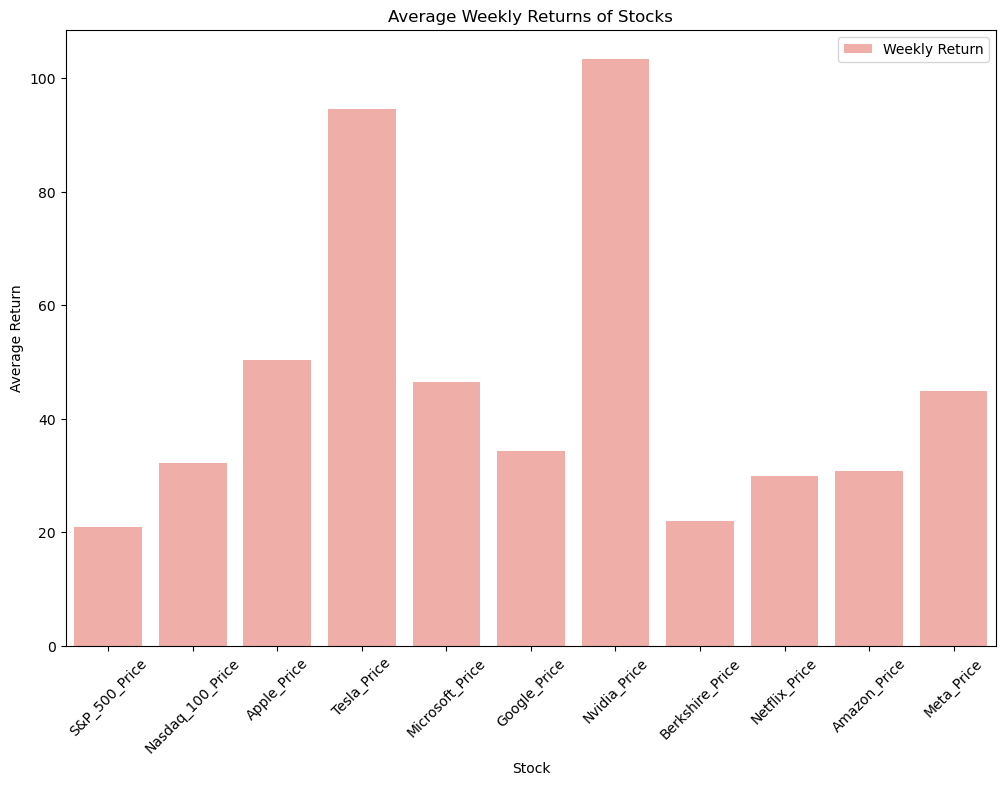

In [164]:
data_visual = pd.DataFrame({'Stock': price, 'Daily_Return': mean_simple_return_array_day, 'Weekly_Return': mean_simple_return_array_year})

plt.figure(figsize=(12, 8))
sns.barplot(x='Stock', y='Weekly_Return', data=data_visual, color='salmon', alpha=0.7, label='Weekly Return')
plt.xticks(rotation=45)
plt.xlabel('Stock')
plt.ylabel('Average Return')
plt.title('Average Weekly Returns of Stocks')
plt.legend()
plt.show()